# ANOVA: Two-Way ANOVA with Interactions

### by

## Jeff Gross


based on SAS e-learning

### n-way ANOVA: n number of predictor variables

<img src="files/interact.png">

<img src="files/two_way.png">

<img src="files/interact_1.png">

<img src="files/interact_2.png">

<img src="files/store_out.png">

<img src="files/proc_plm.png">

<img src="files/proc_plm.png">

### Task: Consider an experiment to test three different brands of concrete to determine whether an additive makes the cement in the concrete stronger.

### Result:
#### Interaction term between Additive and Brand of Concrete:
The difference between reinforced and standard means for Graystone is about -5.38, whereas the mean difference for Consolidated is -3.2 and for EZ Mix is -2.86. Therefore, it appears that the difference between concretes using standard and reinforced cements differs by brand. In other words, it appears that there is an interaction between the Additive and the Brand of concrete. That means that an interaction term in the ANOVA model would be appropriate to assess the statistical significance of the interaction.

There is no significant interaction between Additive and Brand, p-value (.4682) > .05, even though the plot shows slightly different slopes among the three brands of concrete. The interaction term can be removed, and if the additive type is significant, it can be concluded that there is a difference in additive types.

#### Additive versus Standard Concrete
The test for Additive is still significant. There is a difference between standard and reinforced. The estimate of the two least squares means is found in the results for Least Suares means in the analysis the Effects of Additive and Brand
on Concrete Strength without Interaction. A reinforced additive in the concrete seems to add more strength than a standard additive does. The mean difference is about 3.8.

In [2]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";


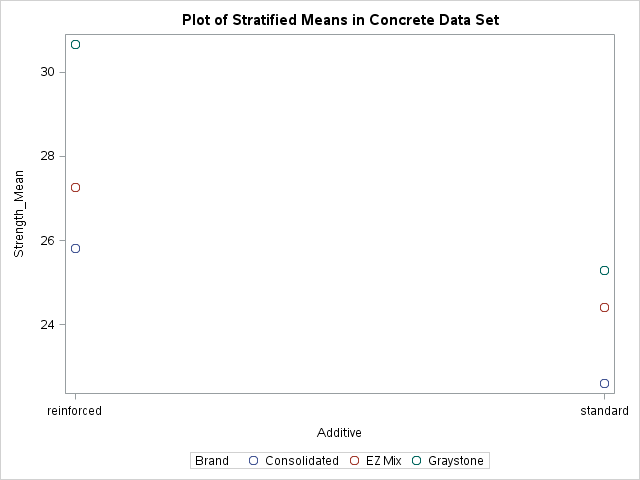
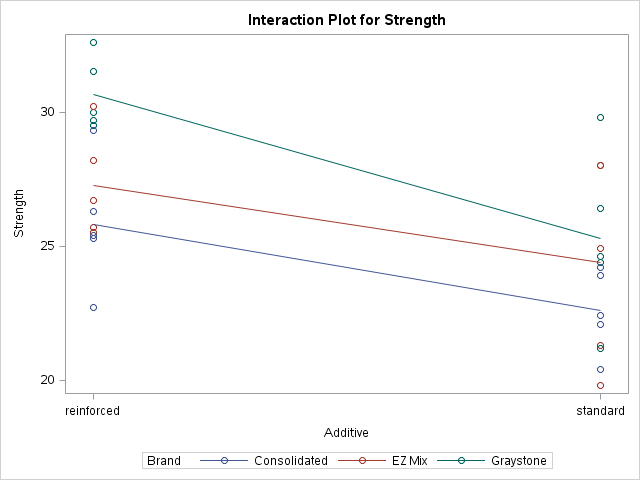
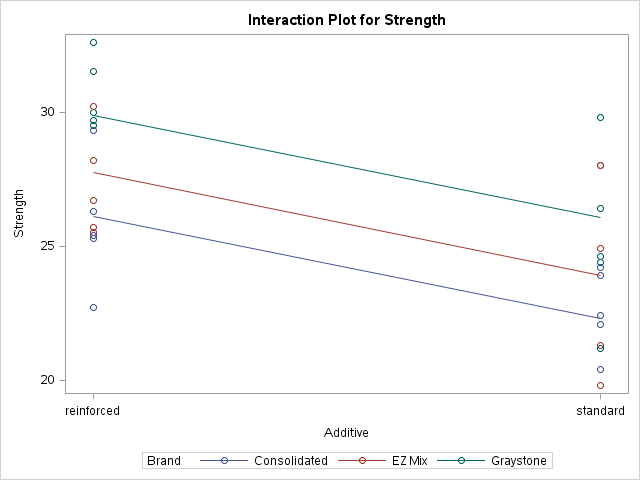
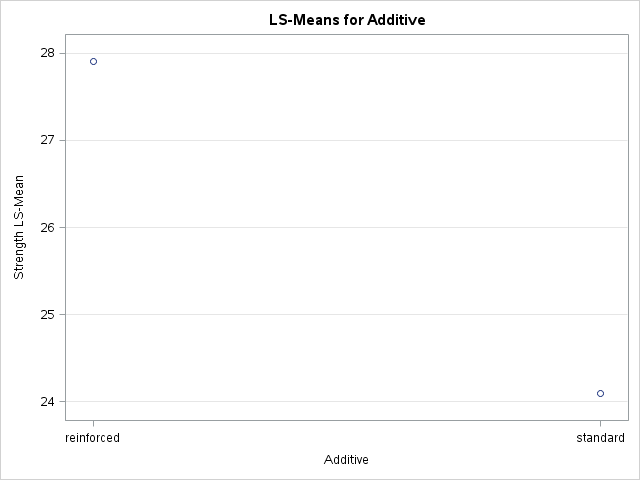

In [3]:
proc means data=statdata.concrete mean var std printalltypes;
   class Brand Additive;
   var Strength;
   output out=means mean=Strength_Mean;
   title 'Selected Descriptive Statistics for Concrete Data Set';
run;

proc sgplot data=means;
   where _TYPE_=3;
   scatter x=Additive y=Strength_Mean / group=Brand 
           markerattrs=(size=10);
   xaxis integer;
   title 'Plot of Stratified Means in Concrete Data Set';
run;
title;

proc glm data=statdata.concrete;
   class Additive Brand;
   model Strength=Additive Brand Additive*Brand;
   title 'Analyze the Effects of Additive and Brand';
   title2 'on Concrete Strength';
run;
quit;
title;

proc glm data=statdata.concrete;
   class Additive Brand;
   model Strength=Additive Brand;
   lsmeans Additive;
   title 'Analyze the Effects of Additive and Brand';
   title2 'on Concrete Strength without Interaction';
run;
quit;
title;